In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

import seaborn as sns

### Import Iris.csv

In [2]:
"""
* The following assumes 'Jupyter Notebook' command is run where the dataset 'Iris.csv' resides
* Configure os path accordingly if your current working directory is different
"""

df_iris = pd.read_csv("Iris.csv")

In [3]:
# Check dimension of data
df_iris.shape

(150, 6)

In [4]:
#Check data Type
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
# No Null values found
df_iris[df_iris.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [6]:
df_iris = df_iris.drop('Id', axis=1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.model_selection import train_test_split
X = df_iris.drop('Species', axis=1)
Y = df_iris[['Species']]

In [8]:
#Check the dataset
Y.sample(5)

,Species
72,Iris-versicolor
31,Iris-setosa
105,Iris-virginica
4,Iris-setosa
67,Iris-versicolor


In [9]:
X.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
35,5.0,3.2,1.2,0.2
101,5.8,2.7,5.1,1.9
55,5.7,2.8,4.5,1.3
24,4.8,3.4,1.9,0.2
61,5.9,3.0,4.2,1.5


### Find the distribution of target variable (Class) (1 Marks)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [11]:
df_iris['Species'] = labelencoder.fit_transform(df_iris.Species)

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130EBBF0>]],
      dtype=object)

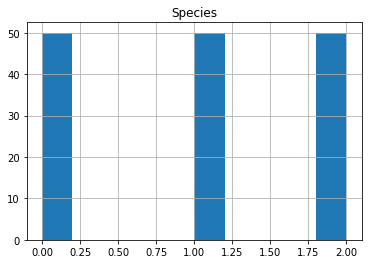

In [12]:
df_iris.hist(column='Species')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

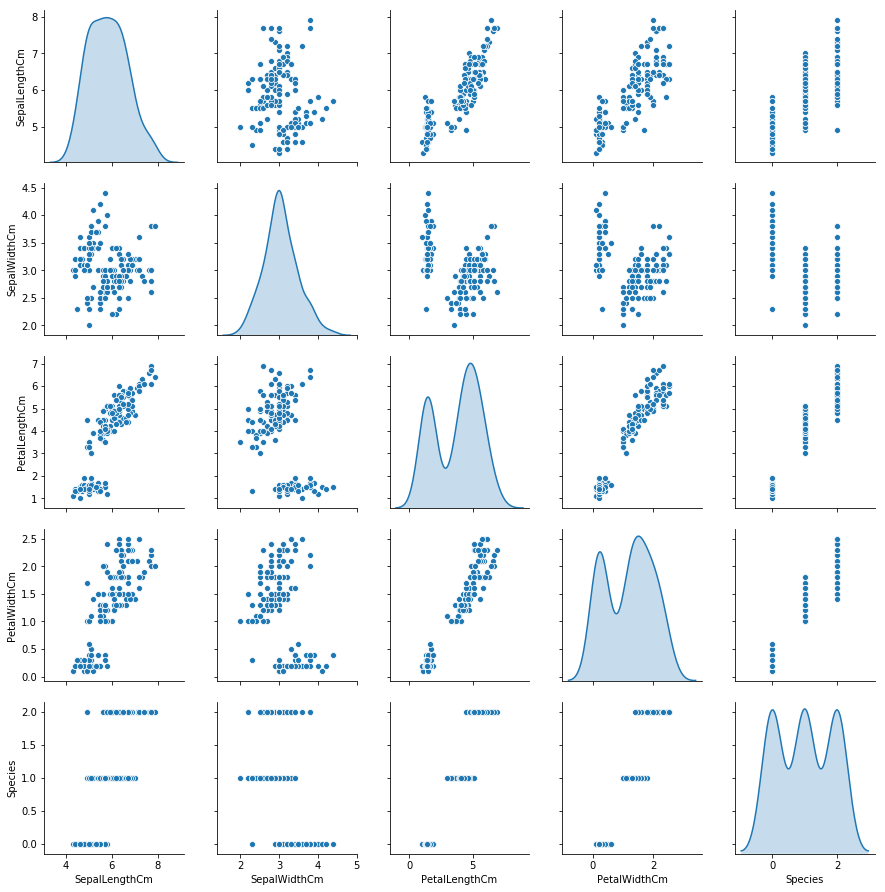

In [13]:
sns.pairplot(df_iris , diag_kind='kde')

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [14]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


### Correlation among all variables and give your insights (1 Marks)

In [15]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here
df_iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


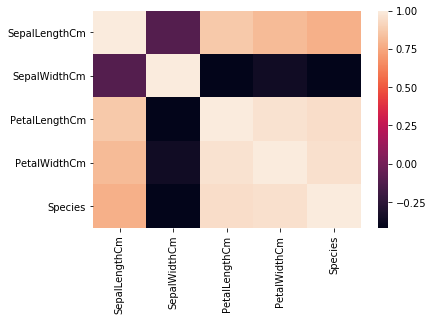

In [16]:
sns.heatmap(df_iris.corr())

In [17]:
#We can see that PetalLengthCm and PetalWidthCm are highly correlated. Hence we need to remove one of the features.
X = X.drop('PetalLengthCm', axis=1)

In [18]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalWidthCm
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2


### Split data in Training and Validation in 80:20 (1 Marks)

In [19]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [21]:
X_train.shape

(120, 3)

In [22]:
X_test.shape

(30, 3)

### Do Feature Scaling ( 1 Marks)

In [23]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X['SepalLengthCm'] = std_scale.fit_transform(X[['SepalLengthCm']])
X['SepalWidthCm'] = std_scale.fit_transform(X[['SepalWidthCm']])
X['PetalWidthCm'] = std_scale.fit_transform(X[['PetalWidthCm']])
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalWidthCm
0,-0.900681,1.032057,-1.312977
1,-1.143017,-0.124958,-1.312977
2,-1.385353,0.337848,-1.312977


### Train and Fit NaiveBayes Model(2 Marks)

In [24]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
#Predict
model.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [26]:
from sklearn import metrics

In [27]:
# show Confusion Matrix
print(metrics.confusion_matrix(y_test, model.predict(X_test)))

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [28]:
#Show precision and Recall metrics
print(metrics.classification_report(y_test, model.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30



In [29]:
# show accuracy
model.score(X_test, y_test)

0.9333333333333333